In [102]:
# Homework 5 (due 07/30/2024)

# SVM and Kernels

### Objective
Through this project, you will learn to use nonlinear kernels to improve a support vector classifier. The toy examples within this project aim to guide you as you build your intuition for the decision boundaries that can be generated via different kernels.

This project is structured as follows:
#### Part 1: Binary classification of synthetic data
1.1. Generate and explore synthetic data

1.2. SVM with nonlinear kernels
#### Part 2: US Flags
2.1. Load and explore flags data

2.2. SVMs for flag pixel data

2.3. Comparison to decision trees


In [103]:
# standard imports
import os, random
import numpy as np
import matplotlib.pyplot as plt

# sklearn imports
from sklearn.datasets import *
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

# you may need to install the PIL in your environment
# for installation in mamba environment type "mamba install pillow -c conda-forge" in your miniforge prompt
# for installation in conda environment type "conda install pillow -c conda-forge" in your conda prompt or anaconda prompt
# for installation via pip type "pip install pillow" in your terminal
from PIL import Image

## Part 1: Binary classification of synthetic data

### Part 1.1: Generate and explore synthetic data
The next cell defines the function `generate_dataset`, which you can use to generate synthetic (i.e., computer generated) data sets for binary classification. It includes eight different methods for data-set generation. 
1. Try out each method and visualize the resulting data set. For the 'swiss' and 'scurve' data sets, try out two different values of the keyword argument `splits`.
2. Comment on WHETHER and WHY you anticipate this data set to be relatively easy or relatively hard to classify with a linear classifier.
3. Comment on WHETHER and WHY you anticipate this data set to be relatively easy or relatively hard to classify with a nonlinear classifier.

In [104]:
# Function to convert an array of real numbers into an array of 0s and 1s
def binarize(arr, split=10):
    # Calculate the decile thresholds
    percentiles = int(np.ceil(100/split))
    split_points = np.arange(0, 100+percentiles, percentiles)
    split_points[split_points>100] = 100
    deciles = np.percentile(arr, split_points)
    
    # Create a new array to hold the modified values
    modified_arr = np.zeros_like(arr)
    
    # Iterate through each decile range and set values accordingly
    for i in range(split):
        print(i)
        if i == split-1:
            if i % 2 == 0:
                # Set values in even deciles to 0
                modified_arr[(arr >= deciles[i])] = 0
            else:
                # Set values in odd deciles to 1
                modified_arr[(arr >= deciles[i])] = 1
        else:        
            if i % 2 == 0:
                # Set values in even deciles to 0
                modified_arr[(arr >= deciles[i]) & (arr < deciles[i + 1])] = 0
            else:
                # Set values in odd deciles to 1
                modified_arr[(arr >= deciles[i]) & (arr < deciles[i + 1])] = 1
    
    return modified_arr

# Function to generate datasets
def generate_dataset(dataset_type, n_samples=300, noise=0.1, split=10, random_state=0):
    if dataset_type == 'linearly_separable':
        X, y = make_classification(n_samples=n_samples, n_features=2, n_redundant=0, n_informative=2,
                                   random_state=random_state, n_clusters_per_class=1)
    elif dataset_type == 'blobs':
        X, y = make_blobs(n_samples=[n_samples//2, n_samples//2], random_state=random_state, cluster_std=noise)
    elif dataset_type == 'quantiles':
        X, y = make_gaussian_quantiles(n_samples=n_samples, n_classes=2, cov=noise, random_state=random_state)
    elif dataset_type == 'moons':
        X, y = make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
    elif dataset_type == 'circles':
        X, y = make_circles(n_samples=n_samples, noise=noise, factor=0.5, random_state=random_state)
    elif dataset_type == 'unstructured':
        X, y = np.random.random(size=(n_samples, 2)), np.random.randint(0,2, size=(n_samples))
    elif dataset_type == 'swiss':
        X, y = make_swiss_roll(n_samples=n_samples, noise=noise, random_state=random_state)
        X=np.array([X[:,0],X[:,2]]).T
        y = binarize(y, split=split)
    elif dataset_type == 'scurve':
        X, y = make_s_curve(n_samples=n_samples, noise=noise, random_state=random_state)
        X=np.array([X[:,0],X[:,2]]).T
        y = binarize(y, split=split)
    else:
        raise ValueError("Invalid dataset type")
    
    X = StandardScaler().fit_transform(X)
    return X, y

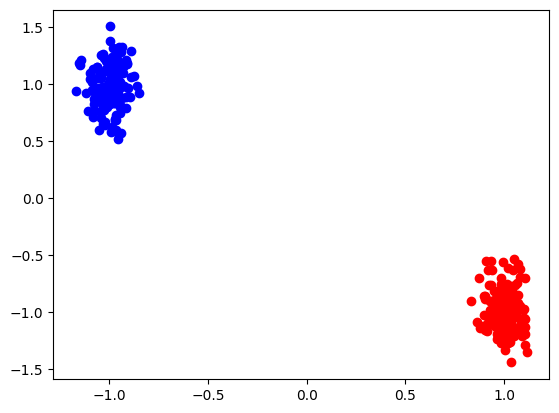

In [105]:
# Generate and visualize data blobs
'''ADD SOME CODE HERE'''
X, y = generate_dataset(dataset_type="blobs")
X0L = []
X1L = []
X0R = []
X1R = []
for index in range(len(y)):
    if y[index] == 0:
        X0L.append(X[index][0])
        X0R.append(X[index][1])
    else:
        X1R.append(X[index][1])
        X1L.append(X[index][0])



plt.scatter(X0R, X0L, color = "r")
plt.scatter(X1R, X1L, color = 'b')



I anticipate that this data set is easily classified with linear and nonlinear classifiers. This is because the two group are linearly seperable, thus both methods should perform well.

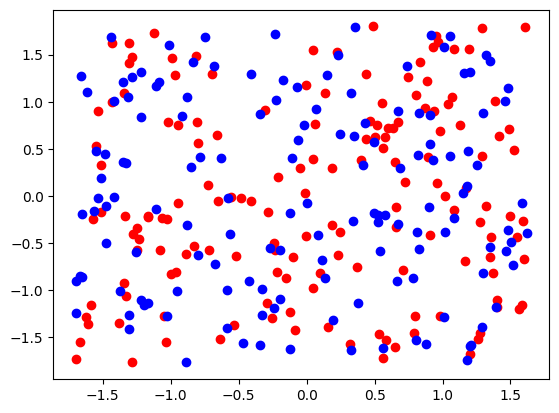

In [106]:
# Generate and visualize unstructured data
'''ADD SOME CODE HERE'''
X, y = generate_dataset(dataset_type="unstructured")
X0L = []
X1L = []
X0R = []
X1R = []
for index in range(len(y)):
    if y[index] == 0:
        X0L.append(X[index][0])
        X0R.append(X[index][1])
    else:
        X1R.append(X[index][1])
        X1L.append(X[index][0])



plt.scatter(X0R, X0L, color = "r")
plt.scatter(X1R, X1L, color = 'b')

I anticipate that this data set will be impossible to use a linear classifier and for a nonlinear classifier, like kNN, it would also not give an accurate predictions. 

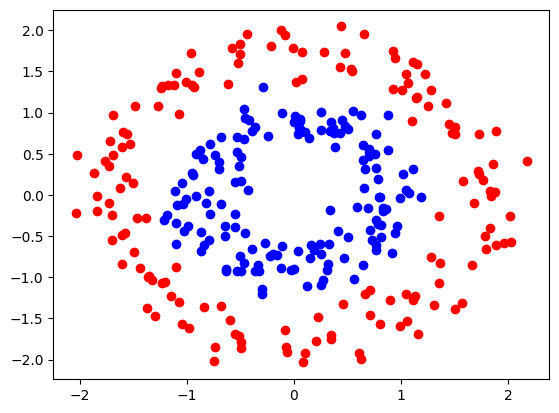

In [107]:
# Generate and visualize circles data set
X, y =generate_dataset(dataset_type="circles")
X0L = []
X1L = []
X0R = []
X1R = []
for index in range(len(y)):
    if y[index] == 0:
        X0L.append(X[index][0])
        X0R.append(X[index][1])
    else:
        X1R.append(X[index][1])
        X1L.append(X[index][0])



plt.scatter(X0R, X0L, color = "r")
plt.scatter(X1R, X1L, color = 'b')

I anticipate that this data set is impossibly difficult to classify linearly, but a nonlinear kernel method could get you a very reasonable model. The two classes are seperable by circular functions, thus they can be seperated by nonlinear classifiers.

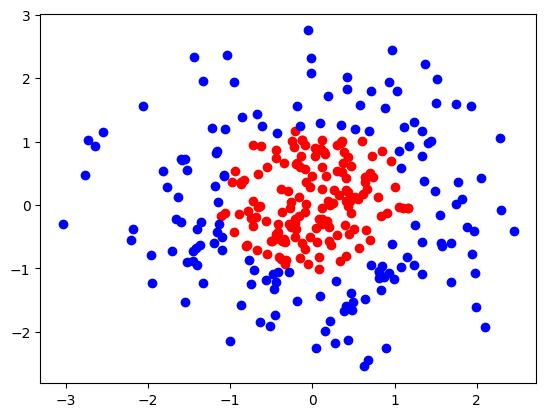

In [108]:
# Generate and visualize Gaussian quantiles
X, y = generate_dataset(dataset_type="quantiles")
X0L = []
X1L = []
X0R = []
X1R = []
for index in range(len(y)):
    if y[index] == 0:
        X0L.append(X[index][0])
        X0R.append(X[index][1])
    else:
        X1R.append(X[index][1])
        X1L.append(X[index][0])



plt.scatter(X0R, X0L, color = "r")
plt.scatter(X1R, X1L, color = 'b')

I anticipate that this data set this hard to use a linear classifier, but a nonlinear classifier could do a decent job. You could use a exponential or gaussian classifier or a kernel method. Also kNN would work for data points not near the boundary.

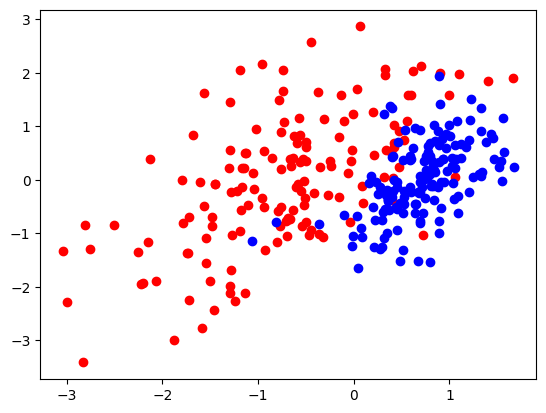

In [109]:
# Generate and visualize linearly separable data
X, y = generate_dataset("linearly_separable")
X0L = []
X1L = []
X0R = []
X1R = []
for index in range(len(y)):
    if y[index] == 0:
        X0L.append(X[index][0])
        X0R.append(X[index][1])
    else:
        X1R.append(X[index][1])
        X1L.append(X[index][0])



plt.scatter(X0R, X0L, color = "r")
plt.scatter(X1R, X1L, color = 'b')

I anticipate that this data set is not the most easy to separate using a linear classifier, if some relaxation of the error caused by the datapoints close to the line, then a decently accurate model could be used. A nonlinear classifier would also work well with this data, be that a kernel method or another nonlinear model.

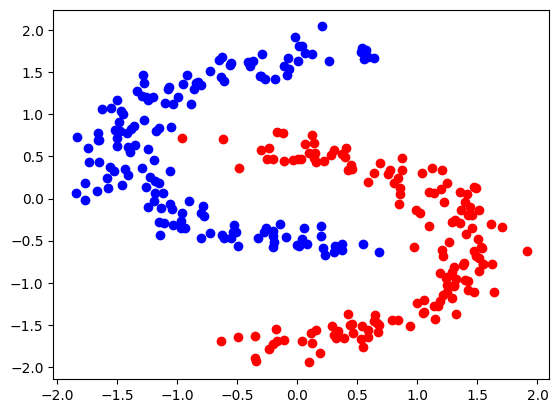

In [110]:
# Generate and visualize moons data set
X, y = generate_dataset(dataset_type='moons')
X0L = []
X1L = []
X0R = []
X1R = []
for index in range(len(y)):
    if y[index] == 0:
        X0L.append(X[index][0])
        X0R.append(X[index][1])
    else:
        X1R.append(X[index][1])
        X1L.append(X[index][0])



plt.scatter(X0R, X0L, color = "r")
plt.scatter(X1R, X1L, color = 'b')

I anticipate that this data set would struggle with linear classifiers. A nonlinear classifier such as a kernel or kNNs would work great on this dataset.

0
1


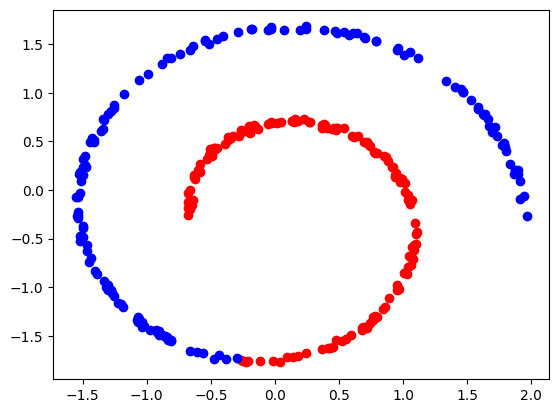

In [111]:
# Generate and visualize swiss role with 2 split sets
X, y = generate_dataset(dataset_type="swiss", split = 2)
X0L = []
X1L = []
X0R = []
X1R = []
for index in range(len(y)):
    if y[index] == 0:
        X0L.append(X[index][0])
        X0R.append(X[index][1])
    else:
        X1R.append(X[index][1])
        X1L.append(X[index][0])



plt.scatter(X0R, X0L, color = "r")
plt.scatter(X1R, X1L, color = 'b')

I anticipate that this data set is possible with linear classifiers, but it wouldn't give better accurracy then the nonlinear model. Nonlinear classifiers would be perfect for this data. It is very easily separable using a curved function.

0
1


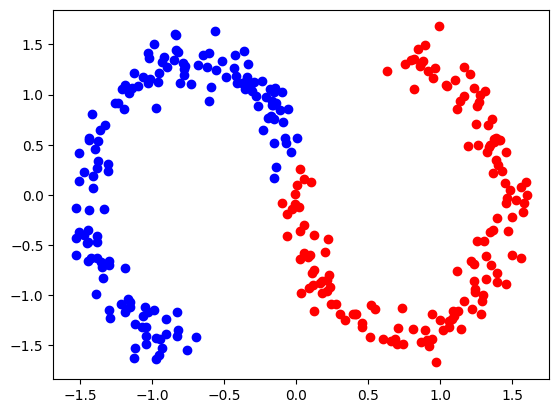

In [112]:
# Generate and visualize S curve with 2 split sets
X, y = generate_dataset(dataset_type="scurve", split = 2)
X0L = []
X1L = []
X0R = []
X1R = []
for index in range(len(y)):
    if y[index] == 0:
        X0L.append(X[index][0])
        X0R.append(X[index][1])
    else:
        X1R.append(X[index][1])
        X1L.append(X[index][0])



plt.scatter(X0R, X0L, color = "r")
plt.scatter(X1R, X1L, color = 'b')

I anticipate that this data set is very easily classified with both nonlinear and linear models.

0
1
2
3
4
5
6
7
8
9


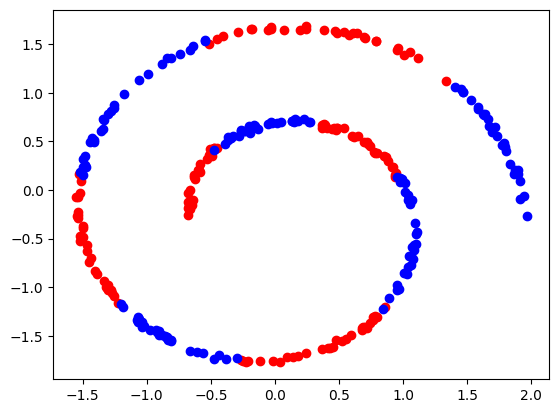

In [113]:
# Generate and visualize swiss role with 10 split sets
X, y = generate_dataset(dataset_type="swiss")
X0L = []
X1L = []
X0R = []
X1R = []
for index in range(len(y)):
    if y[index] == 0:
        X0L.append(X[index][0])
        X0R.append(X[index][1])
    else:
        X1R.append(X[index][1])
        X1L.append(X[index][0])



plt.scatter(X0R, X0L, color = "r")
plt.scatter(X1R, X1L, color = 'b')

I anticipate that this data set is impossible to classify accurately with linear classifiers, but a nonlinear clasifier could perform well with this data.

0
1
2
3
4
5
6
7
8
9


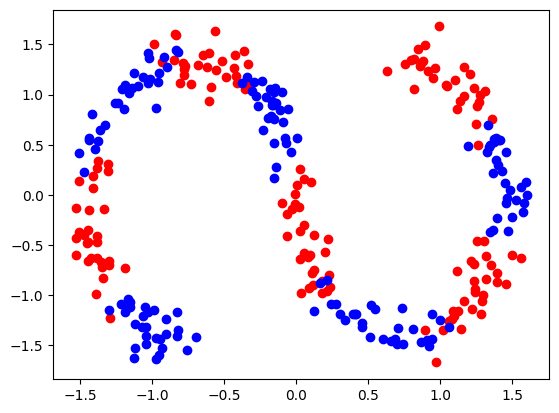

In [114]:
# Generate and visualize S curve with 10 split sets
X, y = generate_dataset(dataset_type="scurve")
X0L = []
X1L = []
X0R = []
X1R = []
for index in range(len(y)):
    if y[index] == 0:
        X0L.append(X[index][0])
        X0R.append(X[index][1])
    else:
        X1R.append(X[index][1])
        X1L.append(X[index][0])



plt.scatter(X0R, X0L, color = "r")
plt.scatter(X1R, X1L, color = 'b')

I anticipate that this data set is impossible to classify with a linear model. There would be some struggle with nonlinear classifier due to the overlap, but if given some lenancy on the boundaries it could be decently accurate.  

### Part 1.2: SVM with nonlinear kernels

The next cell defines the function `kernel_comparison`, which you can use to visually compare the decision boundaries generated by SVMs with different kernels. 

1. The kernel comparison currently produces only visual results. Add code to the function so that it also outputs train and test accuracy of the different SVMs. (Note: Think carefully about where the right place in the code is to do a train-test split.)
2. Run the kernel comparison for the data sets from Part 1.1. Do the results confirm or contradict your expectations that you formulated in Part 1.1.? Did any of the results surprise you?
3. Consult sklearn's documentation to learn how the keyword arguments `degree` and `gamma` affect your classifier. Try out a few different values of these parameters. How and what can one infer from the shape of the decision boundary about the classifier's `degree` or `gamma`?

In [115]:
def kernel_comparison(X, y, support_vectors=True, tight_box=False, if_flag=False, degree = 3, gamma = 3):

    fig = plt.figure(figsize=(10,3))
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
    for ikernel, kernel in enumerate(['linear', 'poly', 'rbf', 'sigmoid']):
        # Train the SVC
        clf = SVC(kernel=kernel, degree=degree, gamma=gamma).fit(X_train, y_train)

        # Train accuracy
        predictions = clf.predict(X_train)
        accuracy = (len(y_train) - np.count_nonzero(predictions - y_train))/len(y_train)
        print("Train accuracy of", kernel, ":", accuracy)

        #Test accuracy
        predictions = clf.predict(X_test)
        accuracy = (len(y_test) - np.count_nonzero(predictions - y_test))/len(y_test)
        print("Test accuracy of", kernel, ":", accuracy)
        print("___________________________")

        # Settings for plotting
        if if_flag:
            ax = plt.subplot(2,2,1+ikernel)
        else:
            ax = plt.subplot(1,4,1+ikernel)
        #x_min, x_max, y_min, y_max = -3, 3, -3, 3
        #ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    
        # Plot decision boundary and margins
        common_params = {"estimator": clf, "X": X, "ax": ax}
        DecisionBoundaryDisplay.from_estimator(
            **common_params,
            response_method="predict",
            plot_method="pcolormesh",
            alpha=0.3,
        )
        DecisionBoundaryDisplay.from_estimator(
            **common_params,
            response_method="decision_function",
            plot_method="contour",
            levels=[-1, 0, 1],
            colors=["k", "k", "k"],
            linestyles=["--", "-", "--"],
        )
    
        if support_vectors:
            # Plot bigger circles around samples that serve as support vectors
            ax.scatter(
                clf.support_vectors_[:, 0],
                clf.support_vectors_[:, 1],
                s=150,
                facecolors="none",
                edgecolors="k",
            )
    
        # Plot samples by color and add legend
        ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
        ax.set_title(kernel)
        ax.axis('off')
        if tight_box:
            ax.set_xlim([X[:, 0].min(), X[:, 0].max()])
            ax.set_ylim([X[:, 1].min(), X[:, 1].max()])


    

In [116]:
# Show results of kernel comparison for data sets from part 1
X, y = generate_dataset('blobs')
X1, y1 = generate_dataset('unstructured')
X2, y2 = generate_dataset('circles')
X3, y3 = generate_dataset('quantiles')
X4, y4 = generate_dataset('linearly_separable')
X5, y5 = generate_dataset('swiss', split= 2)
X6, y6 = generate_dataset('swiss', split = 10)
X7, y7 = generate_dataset('scurve', split= 2)
X8, y8 = generate_dataset('scurve', split = 10)

0
1
0
1
2
3
4
5
6
7
8
9
0
1
0
1
2
3
4
5
6
7
8
9


Train accuracy of linear : 1.0
Test accuracy of linear : 1.0
___________________________
Train accuracy of poly : 1.0
Test accuracy of poly : 1.0
___________________________
Train accuracy of rbf : 1.0
Test accuracy of rbf : 1.0
___________________________
Train accuracy of sigmoid : 1.0
Test accuracy of sigmoid : 1.0
___________________________


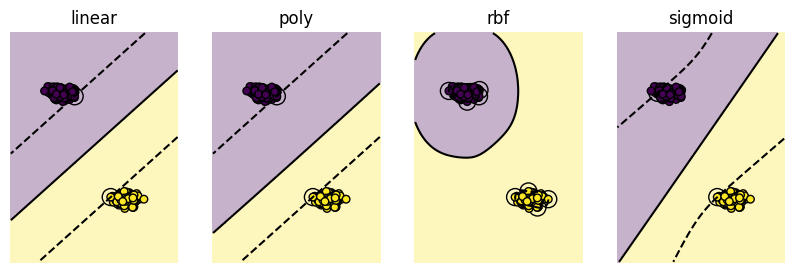

In [117]:
kernel_comparison(X,y)

Train accuracy of linear : 0.5291666666666667
Test accuracy of linear : 0.5166666666666667
___________________________
Train accuracy of poly : 0.5291666666666667
Test accuracy of poly : 0.5166666666666667
___________________________
Train accuracy of rbf : 0.6916666666666667
Test accuracy of rbf : 0.4
___________________________
Train accuracy of sigmoid : 0.45
Test accuracy of sigmoid : 0.5666666666666667
___________________________


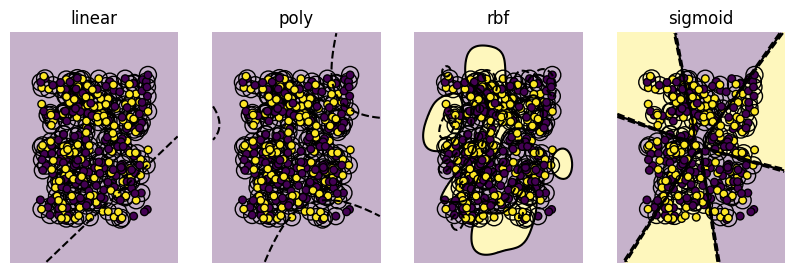

In [118]:
kernel_comparison(X1,y1)

Train accuracy of linear : 0.5208333333333334
Test accuracy of linear : 0.4166666666666667
___________________________


Train accuracy of poly : 0.5208333333333334
Test accuracy of poly : 0.4166666666666667
___________________________
Train accuracy of rbf : 0.9958333333333333
Test accuracy of rbf : 1.0
___________________________
Train accuracy of sigmoid : 0.5333333333333333
Test accuracy of sigmoid : 0.43333333333333335
___________________________


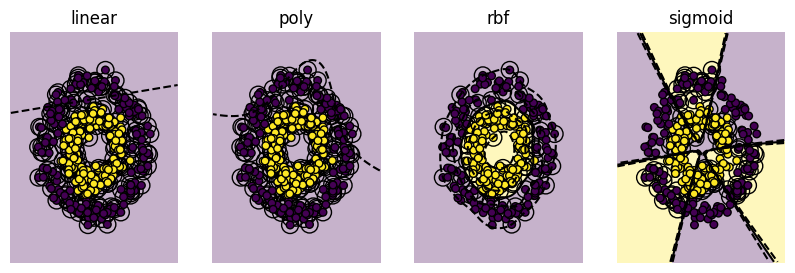

In [119]:
kernel_comparison(X2,y2)

Train accuracy of linear : 0.6666666666666666
Test accuracy of linear : 0.4666666666666667
___________________________
Train accuracy of poly : 0.6708333333333333
Test accuracy of poly : 0.55
___________________________
Train accuracy of rbf : 0.9916666666666667
Test accuracy of rbf : 0.95
___________________________
Train accuracy of sigmoid : 0.44583333333333336
Test accuracy of sigmoid : 0.5166666666666667
___________________________


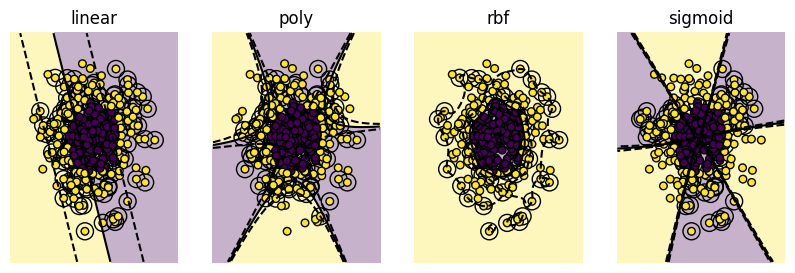

In [120]:
kernel_comparison(X3,y3)

Train accuracy of linear : 0.9083333333333333
Test accuracy of linear : 0.95
___________________________
Train accuracy of poly : 0.9041666666666667
Test accuracy of poly : 0.85
___________________________
Train accuracy of rbf : 0.9208333333333333
Test accuracy of rbf : 0.9
___________________________
Train accuracy of sigmoid : 0.7375
Test accuracy of sigmoid : 0.7666666666666667
___________________________


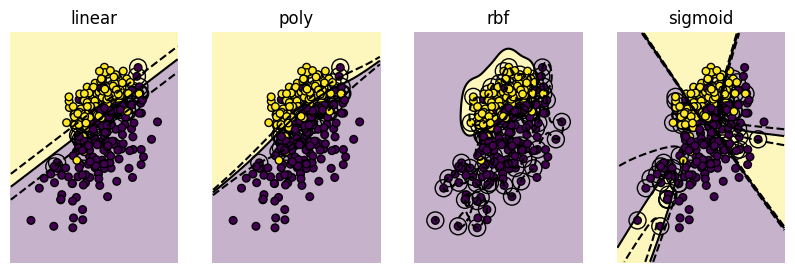

In [121]:
kernel_comparison(X4,y4)

Train accuracy of linear : 0.6458333333333334
Test accuracy of linear : 0.6333333333333333
___________________________
Train accuracy of poly : 0.6666666666666666
Test accuracy of poly : 0.65
___________________________
Train accuracy of rbf : 0.9958333333333333
Test accuracy of rbf : 0.95
___________________________
Train accuracy of sigmoid : 0.4041666666666667
Test accuracy of sigmoid : 0.5
___________________________


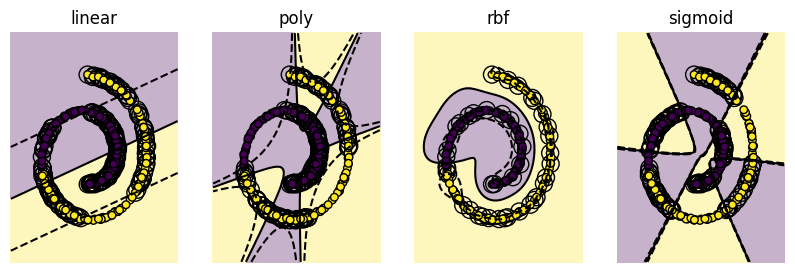

In [122]:
kernel_comparison(X5,y5)

Train accuracy of linear : 0.5833333333333334
Test accuracy of linear : 0.6
___________________________
Train accuracy of poly : 0.7375
Test accuracy of poly : 0.7
___________________________
Train accuracy of rbf : 0.975
Test accuracy of rbf : 0.9833333333333333
___________________________
Train accuracy of sigmoid : 0.2916666666666667
Test accuracy of sigmoid : 0.36666666666666664
___________________________


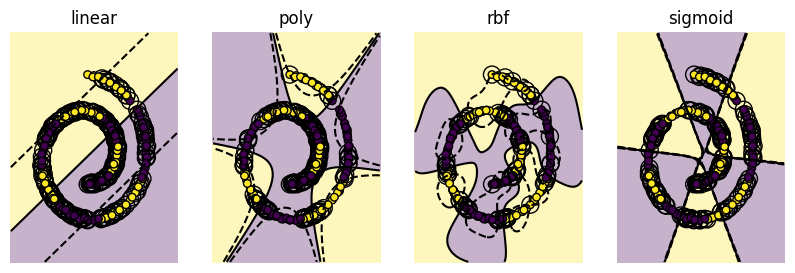

In [123]:
kernel_comparison(X6,y6)

Train accuracy of linear : 1.0
Test accuracy of linear : 1.0
___________________________
Train accuracy of poly : 0.9833333333333333
Test accuracy of poly : 0.95
___________________________
Train accuracy of rbf : 0.9958333333333333
Test accuracy of rbf : 1.0
___________________________
Train accuracy of sigmoid : 0.7
Test accuracy of sigmoid : 0.8166666666666667
___________________________


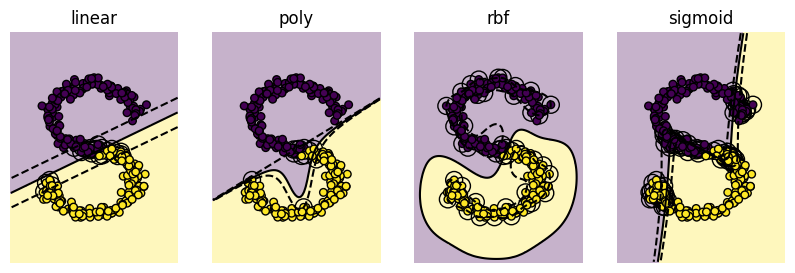

In [124]:
kernel_comparison(X7,y7)

Train accuracy of linear : 0.475
Test accuracy of linear : 0.4
___________________________
Train accuracy of poly : 0.7916666666666666
Test accuracy of poly : 0.75
___________________________
Train accuracy of rbf : 0.9458333333333333
Test accuracy of rbf : 0.9166666666666666
___________________________
Train accuracy of sigmoid : 0.3958333333333333
Test accuracy of sigmoid : 0.36666666666666664
___________________________


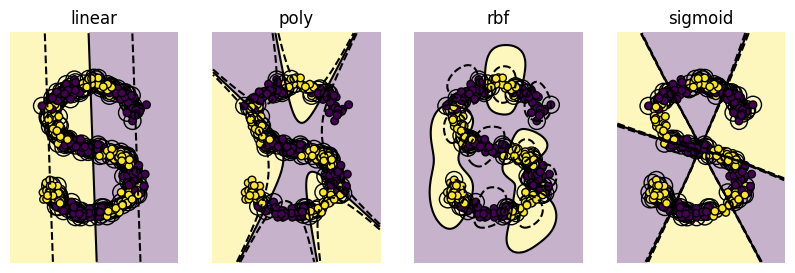

In [125]:
kernel_comparison(X8,y8)

To summarize the results of the kernel comparison, there were really no surprises. All the models performed as I expected them to. Some of the sigmoid models, did fascinate me. They somehow got less than 50% accuracy, which is worst the random chance. The data is split 50, 50 between the categories, and somehow the model did worse then just choosing all of one category.

Train accuracy of linear : 0.6541666666666667
Test accuracy of linear : 0.6333333333333333
___________________________
Train accuracy of poly : 0.5916666666666667
Test accuracy of poly : 0.5666666666666667
___________________________
Train accuracy of rbf : 0.9916666666666667
Test accuracy of rbf : 0.9833333333333333
___________________________
Train accuracy of sigmoid : 0.42083333333333334
Test accuracy of sigmoid : 0.45
___________________________


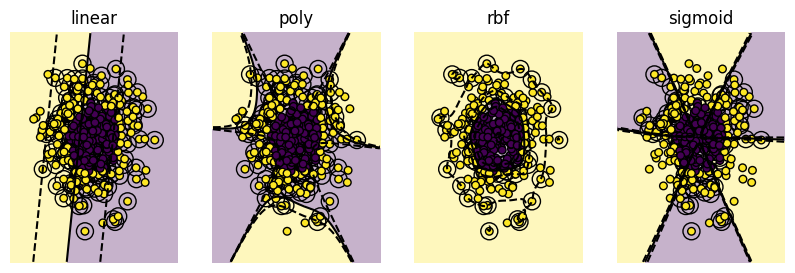

In [126]:
# Examine effect of degree and gamma keyword
kernel_comparison(X3, y3, degree = 5)


Train accuracy of linear : 0.4791666666666667
Test accuracy of linear : 0.4166666666666667
___________________________
Train accuracy of poly : 0.7458333333333333
Test accuracy of poly : 0.6833333333333333
___________________________
Train accuracy of rbf : 0.9791666666666666
Test accuracy of rbf : 0.95
___________________________
Train accuracy of sigmoid : 0.30833333333333335
Test accuracy of sigmoid : 0.31666666666666665
___________________________


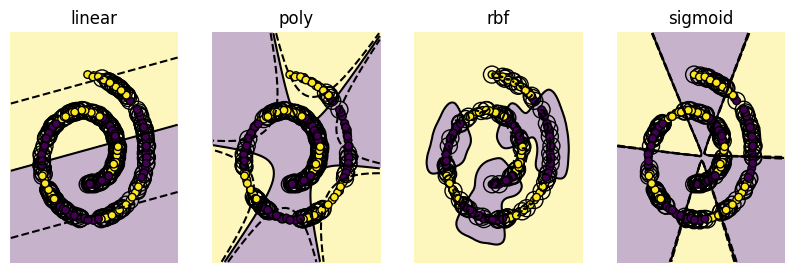

In [127]:
kernel_comparison(X6, y6, gamma= 10)

The `degree` argument affects Gaussian. It changes the model by changing the degree of polynomial the fitting boundary uses. This affects the model's bias-variance tradeoff by increasing overfitting, thus increasing variance and decreasing bias. 

As one increases the `degree`, the decision boundary becomes more curved, with more degrees of polynomial. 

The `gamma` argument affects swiss with split 10. It changes the model by changing the kernel coefficient for poly, rbf, and sigmoid. This affects the model's bias-variance tradeoff by overfitting the data. This is because as gamma increases the function cares more about individual points leading to higher training accuracy and lower test accuracy. 

As one increases `gamma`, the decision boundary becomes sharper. 


## Part 2: US Flags

### Part 2.1: Load and explore flags data
The function `load_images` loads the image data from the flags folder and turns each image into a binary (i.e., black and white) array.

1. Load the flags data.
2. Display four flags of your choice in a figure. Use the `matplotlib` commands `subplot` and `imshow` to create a figure with 2x2 flags. Consult the `matplotlib` documentation to find a way set the aspect ratio of your displayed flags to match their original aspect ratio. Update your code accordingly.

In [128]:
def load_images(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).convert('L')  # Convert image to black and white
            img = np.array(img)//(256/2) # Convert to BW
            images.append(img)
            labels.append(filename.split('.')[0])  # Extract the state code as label
    return images, labels

/Users/ethanbaird/Desktop/Dartmouth/Math/Math_76/Homework5/.venv/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


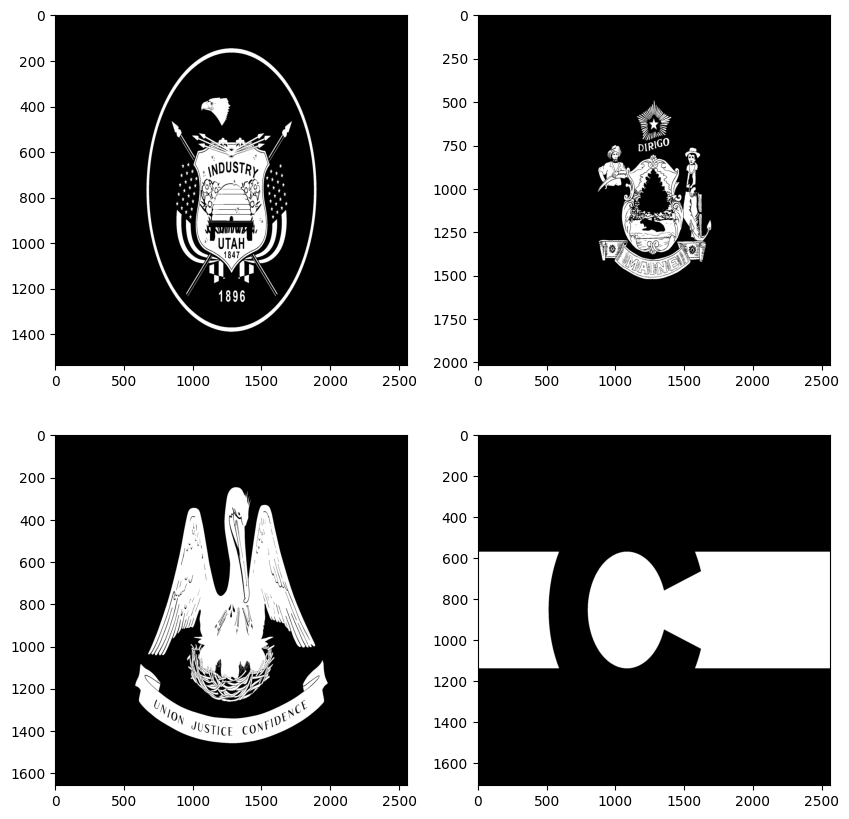

In [129]:
# Display four black-and-white flags in a 2x2 grid
images, labels = load_images("flags")
fig = plt.figure(figsize=(10,10))

im1 = fig.add_subplot(2,2,1)
im1.set_label(labels[0])
plt.imshow(images[0], aspect="auto", cmap = "grey")

im2 = fig.add_subplot(2,2,2)
im2.set_label(labels[1])
plt.imshow(images[1], aspect="auto", cmap = "grey")

im3 = fig.add_subplot(2,2,3)
im3.set_label(labels[2])
plt.imshow(images[2], aspect="auto", cmap = "grey")

im4 = fig.add_subplot(2,2,4)
im4.set_label(labels[3])
plt.imshow(images[3], aspect="auto", cmap = "grey")



### Part 2.2: SVMs for flag pixel data
The function `sample_pixels` samples a pixel from a given image uniformly at random. 

1. Use the `sample_pixels`  function to generate synthetic data sets of pixels from for a flag image.
2. Update the `kernel_comparison` function so that if `if_flag` is `True` the decision boundaries are plotted in a 2x2 grid of subplots with plot ranges matching the height and width of the flags.
3. Show the results of the kernel comparison for the four flags that your previously selected. Use the highest values of `degree` and `gamma` that still run *reasonably fast* on your laptop.
4. Adjust your code so that you can run the quantitative part (i.e., the calculation of train and test accuracy) without plotting the decision boundaries. Run the adjusted code on all flags to indentify for each kernel the flags that yield to best easiest-to-classify and hardest-to-classify data sets. Test how the number of of pixels sampled affects your results.

In [130]:
def sample_pixels(image, num_samples=2000):
    pixel_data = []
    pixel_labels = []
    height, width = image.shape
    for _ in range(num_samples):
        x1 = random.randint(0, width - 1)
        x2 = random.randint(0, height - 1)
        pixel_data.append([x1/width-0.5, x2/width-0.5])
        pixel_labels.append(image[x2,x1])
    return np.array(pixel_data), np.array(pixel_labels, dtype=int)

Train accuracy of linear : 0.918125
Test accuracy of linear : 0.91
___________________________
Train accuracy of poly : 0.918125
Test accuracy of poly : 0.91
___________________________
Train accuracy of rbf : 0.918125
Test accuracy of rbf : 0.91
___________________________
Train accuracy of sigmoid : 0.8875
Test accuracy of sigmoid : 0.87
___________________________
Train accuracy of linear : 0.94625
Test accuracy of linear : 0.9525
___________________________
Train accuracy of poly : 0.94625
Test accuracy of poly : 0.9525
___________________________
Train accuracy of rbf : 0.94625
Test accuracy of rbf : 0.9525
___________________________
Train accuracy of sigmoid : 0.944375
Test accuracy of sigmoid : 0.9525
___________________________
Train accuracy of linear : 0.83875
Test accuracy of linear : 0.8075
___________________________
Train accuracy of poly : 0.83875
Test accuracy of poly : 0.8075
___________________________
Train accuracy of rbf : 0.875
Test accuracy of rbf : 0.86
_______

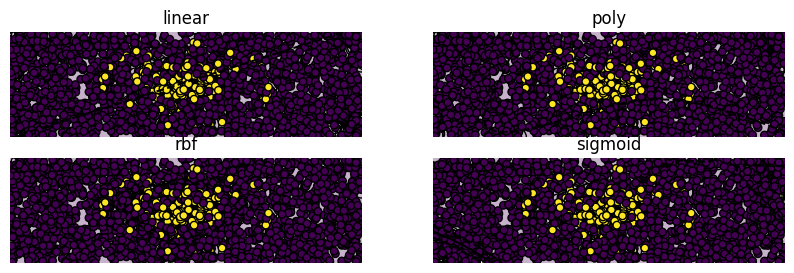

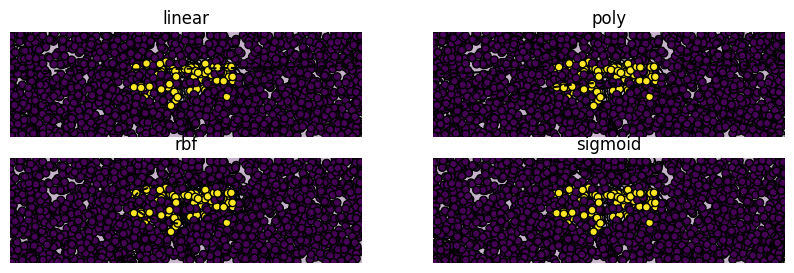

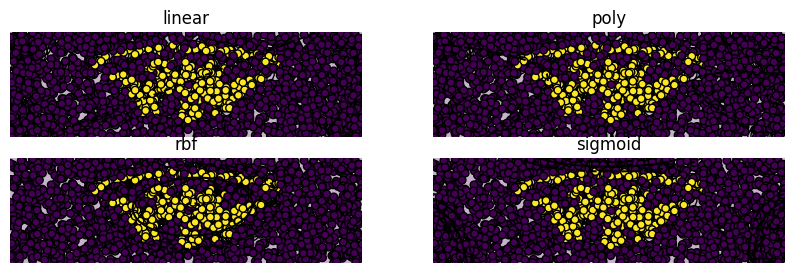

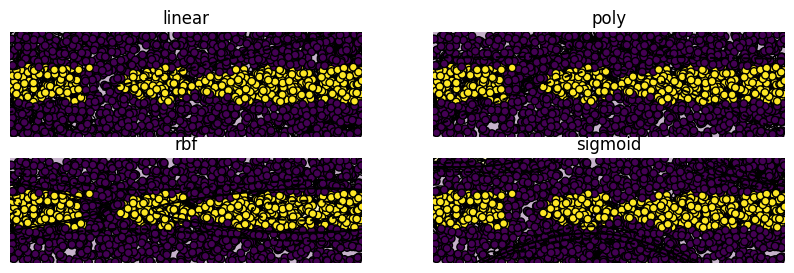

In [131]:
# Visual kernel comparison for selected flags
for i in range(4):
    imX, imY = sample_pixels(images[i])
    kernel_comparison(imX, imY, if_flag=True, tight_box=True )


In [132]:
# Non-visual kernel comparison for all flags
'''ADD SOME CODE HERE'''
def kernel_comparison_nonvisual(X, y, support_vectors=True, tight_box=False, if_flag=False, degree = 3, gamma = 3):
    linAcc = 0
    polyAcc = 0
    rbfAcc = 0
    sigAcc = 0
    fig = plt.figure(figsize=(10,3))
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
    for ikernel, kernel in enumerate(['linear', 'poly', 'rbf', 'sigmoid']):
        # Train the SVC
        clf = SVC(kernel=kernel, degree=degree, gamma=gamma).fit(X_train, y_train)

        # Train accuracy
        predictions = clf.predict(X_train)
        accuracy = (len(y_train) - np.count_nonzero(predictions - y_train))/len(y_train)
        print("Train accuracy of", kernel, ":", accuracy)

        #Test accuracy
        predictions1 = clf.predict(X_test)
        accuracy1 = (len(y_test) - np.count_nonzero(predictions1 - y_test))/len(y_test)
        print("Test accuracy of", kernel, ":", accuracy1)
        print("___________________________")

        if kernel == "linear":
            linAcc = accuracy1
        elif kernel == "poly":
            polyAcc = accuracy1
        elif kernel == 'rbf':
            rbfAcc = accuracy1
        else:
            sigAcc = accuracy1
    
    return linAcc, polyAcc, rbfAcc, sigAcc
    

In [133]:

linAccList, polyAccList, rbfAccList, sigAccList = [],[],[],[]


for i in range(len(images)):
    imX, imY = sample_pixels(images[i])
    print('Flag,', i+1)
    linAcc, polyAcc, rbfAcc, sigAcc = kernel_comparison_nonvisual(imX, imY, gamma=8, degree=8)
    linAccList.append(linAcc)
    polyAccList.append(polyAcc)
    rbfAccList.append(rbfAcc)
    sigAccList.append(sigAcc)



Flag, 1
Train accuracy of linear : 0.913125
Test accuracy of linear : 0.9175
___________________________
Train accuracy of poly : 0.913125
Test accuracy of poly : 0.9175
___________________________
Train accuracy of rbf : 0.913125
Test accuracy of rbf : 0.9175
___________________________
Train accuracy of sigmoid : 0.84
Test accuracy of sigmoid : 0.83
___________________________
Flag, 2
Train accuracy of linear : 0.9525
Test accuracy of linear : 0.95
___________________________
Train accuracy of poly : 0.9525
Test accuracy of poly : 0.95
___________________________
Train accuracy of rbf : 0.9525
Test accuracy of rbf : 0.95
___________________________
Train accuracy of sigmoid : 0.928125
Test accuracy of sigmoid : 0.93
___________________________
Flag, 3
Train accuracy of linear : 0.840625
Test accuracy of linear : 0.8275
___________________________
Train accuracy of poly : 0.840625
Test accuracy of poly : 0.8275
___________________________
Train accuracy of rbf : 0.888125
Test accuracy

/var/folders/rm/mkw7x_1d2b34m_bvg391sv7c0000gn/T/ipykernel_7008/53557812.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10,3))


Train accuracy of poly : 0.905625
Test accuracy of poly : 0.89
___________________________
Train accuracy of rbf : 0.905625
Test accuracy of rbf : 0.89
___________________________
Train accuracy of sigmoid : 0.818125
Test accuracy of sigmoid : 0.8225
___________________________
Flag, 22
Train accuracy of linear : 0.90875
Test accuracy of linear : 0.8975
___________________________
Train accuracy of poly : 0.90875
Test accuracy of poly : 0.8975
___________________________
Train accuracy of rbf : 0.90875
Test accuracy of rbf : 0.8975
___________________________
Train accuracy of sigmoid : 0.821875
Test accuracy of sigmoid : 0.83
___________________________
Flag, 23
Train accuracy of linear : 0.7725
Test accuracy of linear : 0.755
___________________________
Train accuracy of poly : 0.80125
Test accuracy of poly : 0.7775
___________________________
Train accuracy of rbf : 0.934375
Test accuracy of rbf : 0.9525
___________________________
Train accuracy of sigmoid : 0.571875
Test accuracy 

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

Train accuracy of linear : 0.97375
Test accuracy of linear : 0.98
___________________________
Train accuracy of poly : 0.97375
Test accuracy of poly : 0.98
___________________________
Train accuracy of rbf : 0.97375
Test accuracy of rbf : 0.98
___________________________
Train accuracy of sigmoid : 0.961875
Test accuracy of sigmoid : 0.97
___________________________
nv


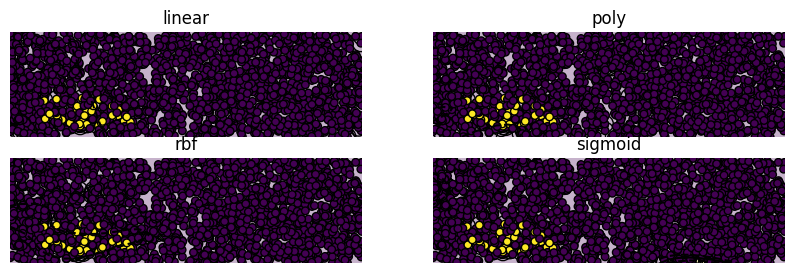

In [134]:
imX, imY = sample_pixels(images[32])
kernel_comparison(imX, imY, gamma=8, degree=8, if_flag=True, tight_box=True)
print(labels[32])

In [135]:
linAccArray = np.array(linAccList)
polyAccArray = np.array(polyAccList)
rbfAccArray = np.array(rbfAccList)
sigAccArray = np.array(sigAccList)
print(np.argpartition(linAccArray, -3)[-3:])
print(np.argpartition(linAccArray, 3)[:3])
print(np.argpartition(polyAccArray, -3)[-3:])
print(np.argpartition(polyAccArray, 3)[:3])
print(np.argpartition(rbfAccArray, -3)[-3:])
print(np.argpartition(rbfAccArray, 3)[:3])
print(np.argpartition(sigAccArray, -3)[-3:])
print(np.argpartition(sigAccArray, 3)[:3])

print(labels[36])


[32 47 30]
[ 6 26 36]
[32 30 47]
[ 6 39 42]
[32 30 47]
[19  6 28]
[32 30 47]
[ 6 26  3]
wv


For these experiments, I set `num_samples` to 2000 because the results of the experiments seem to be the most stable for this number of sampled pixels.

The linear kernel performed best (i.e., highest test accuracy) on the flags of the following three states: 

Alaska, Rhode Island, and Nevada

It performed worst on the flags of the following three states: 

Maryland, Iowa, Hawaii

The polynomial kernel performed best on the flags of the following three states: 

Alaska, Rhode Island, and Nevada

It performed worst on the flags of the following three states: 

Maryland, Alabama, Hawaii

The radial-basis function kernel performed best on the flags of the following three states: 

Alaska, Rhode Island, and Nevada

It performed worst on the flags of the following three states: 

Maryland, Hawaii, West Virginia

The sigmoid kernel performed best on the flags of the following three states: 

Alaska, Rhode Island, and Nevada

It performed worst on the flags of the following three states:

Iowa, Missouri, West Virginia

### Part 2.3: Comparison to decision trees
Decision trees and SVMs yield substantially different decision boundaries.

1. An arbitrarily complex decision tree would be able to achieve perfect training accuracy on any data set. Explain why.
2. For a very large data set of flag pixels, an arbitrarily complex decision tree is likely to achieve (almost) perfect test accuracy as well. Explain why.
3. Select four flags for which you anticipate a *simple* decision tree to outperform all your SVMs. Write code that fits a decision tree to a flag pixel data set. Use your code to check your hypothesis. 

An arbitrarily complex decision tree would be able to achieve perfect training accuracy on any data set, because a data set as a finite amount of data points, and if you have the same leaves as data points, then the decision tree would have 100% training accuracy.

For a very large data set of flag pixels, an arbitrarily complex decision tree is likely to achieve (almost) perfect test accuracy because the data is sampled from the distribution randomly, thus the decision tree would just get the full shape of the flag, thus having almost perfect test accuracy.

A simple decision tree is likely to perform well on the sampled pixel data of the flags of Maryland, Iowa, Hawaii, Alabama.

In [136]:
# Comparison of SVM and decision tree performance on sampled pixel data for four flags
from sklearn.tree import DecisionTreeClassifier
FlagIndex = [6,26,19,39]
for index in FlagIndex:
    dtc = DecisionTreeClassifier(max_leaf_nodes=300)
    imX, imY = sample_pixels(images[index])
    X_train, X_test, y_train, y_test = train_test_split(imX, imY)
    dtc.fit(X_train, y_train)
    predictionsTrain= dtc.predict(X_train)
    accuracyTrain = (len(y_train) - np.count_nonzero(predictionsTrain - y_train))/len(y_train)
    predictionsTest= dtc.predict(X_test)
    accuracyTest = (len(y_test) - np.count_nonzero(predictionsTest - y_test))/len(y_test)
    print("Flag:", index)
    print("Train Accuracy:", accuracyTrain)
    print("Test Accuracy:", accuracyTest)
    print("-----------------------------")


Flag: 6
Train Accuracy: 1.0
Test Accuracy: 0.88
-----------------------------
Flag: 26
Train Accuracy: 1.0
Test Accuracy: 0.922
-----------------------------
Flag: 19
Train Accuracy: 1.0
Test Accuracy: 0.952
-----------------------------
Flag: 39
Train Accuracy: 1.0
Test Accuracy: 0.928
-----------------------------


The Decision trees took the accuracy from 50,60 % to 90%. This is a staggering increase in accuracy. 